In [ ]:
import numpy as np
import cv2
import os

In [ ]:
severity_code = {'MILD': 0,
                'MODERATE': 1,
                'NORMAL': 2,
                'SEVERE': 3}

In [ ]:
source_folder_train = '/Users/aravdhoot/Remote-PD-Detection/energy_images/Train'
channels = 3
resized_images_train = []

In [ ]:
for severity in os.listdir(source_folder_train):
    for image in os.listdir(os.path.join(source_folder_train, severity)):
        file_path = os.path.join(source_folder_train, severity, image)
        image = cv2.imread(file_path)
        image_arr = cv2.resize(image, (250, 250))
        resized_images_train.append(image_arr)

num_samples = len(resized_images_train)
input_shape = (num_samples, 250, 250, channels)
input_array_train = np.empty(input_shape, dtype=np.uint8)

In [ ]:
input_array_train = np.array(resized_images_train)
print(input_array_train.shape)
x_train = input_array_train

y_train = list()
for severity in os.listdir(source_folder_train):
    for image in os.listdir(os.path.join(source_folder_train,severity)):
        y_train.append(severity_code[severity])

In [ ]:
source_folder_val = 
channels = 3
resized_images_val = []

In [ ]:
for severity in os.listdir(source_folder_val):
    for image in os.listdir(os.path.join(source_folder_val, severity)):
        file_path = os.path.join(source_folder_val, severity, image)
        image = cv2.imread(file_path)
        image_arr = cv2.resize(image, (250, 250))
        resized_images_val.append(image_arr)

num_samples = len(resized_images_val)
input_shape = (num_samples, 250, 250, channels)
input_array = np.empty(input_shape, dtype=np.uint8)

In [ ]:
input_array_val = np.array(resized_images_val)
print(input_array.shape)
x_val = input_array

y_val = list()
for severity in os.listdir(source_folder_val):
    for image in os.listdir(os.path.join(source_folder_val,severity)):
        y_val.append(severity_code[severity])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_val = encoder.fit_transform(np.array(y_val).reshape(-1,1))
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
import tensorflow as tf

opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

print('Model Details are : ')
print(model.summary())

In [ ]:
epochs = 100
batch_size = 4

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

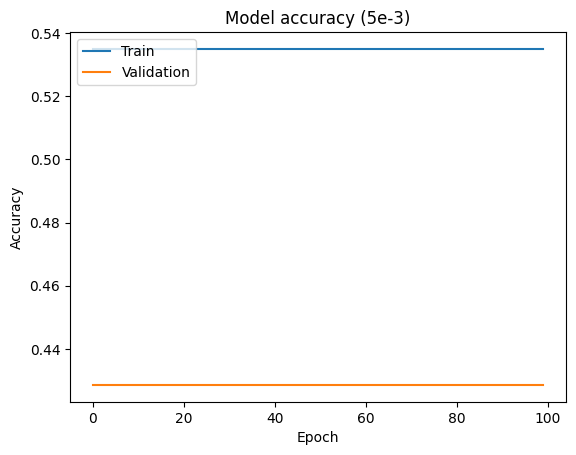

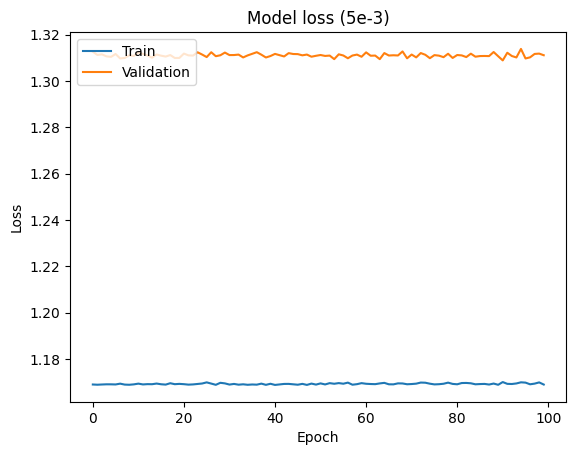

In [80]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy (5e-3)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss (5e-3)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()